In [1]:
file_name = "graph_path_planning.ipynb"
import sys
import os
sys.path.insert(0, os.path.abspath(
    os.path.join(os.path.dirname(file_name), '../../src/') ))

import numpy as np
import math
from random import randrange
import matplotlib.pyplot as plt

from utils import *

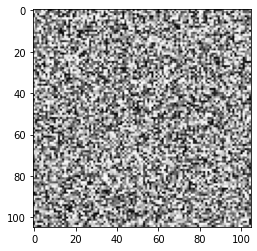

(105, 105) (-2.6, 2.6) (2.5999999999999814, -2.5999999999999814)


In [2]:
lim_x = lim_y = [-2.6, 2.6]
cell_size = 0.05

centers_x = np.arange(lim_x[0], lim_x[1]+cell_size, cell_size)
centers_y = np.arange(lim_y[1], lim_y[0]-cell_size, -cell_size)

num_cells_x = len(centers_x)
num_cells_y = len(centers_y)

grid = []
for i in range(num_cells_x):
    grid.append([])
    for j in range(num_cells_y):
        grid[i].append(randrange(255))

grid = np.array(grid)

im = plt.imshow(grid, cmap='Greys')
plt.show()

print(grid.shape, (centers_x[0], centers_y[0]), (centers_x[-1], centers_y[-1]))

In [11]:
def fill_grid(sensor_pos, sensor_deg, distance):
    
    xr, yr = sensor_pos[0], sensor_pos[1]
    z = distance
    e = 0.2
    theta = sensor_deg[2] 
    
    a = (math.pi/4) # 45 degrees
    
    for i in range(num_cells_x):
        for j in range(num_cells_y):
            
            grid[i][j] = 0
            
            xg, yg = centers_x[i], centers_y[j]
        
            # check if inside ring
            dist_to_sensor = (xg - xr)**2 + (yg - yr)**2
            ring_l = (z - e/2)**2
            ring_h = (z + e/2)**2
            
            if ring_l <= dist_to_sensor <= ring_h:
                # check if inside sensor cone
                phi = np.arctan2((yg - yr), (xg - yr) ) - theta
                
                if (theta - a/2) < phi < (theta + a/2):
                    #inside sensor cone
                    grid[i][j] = 255

In [4]:
clientID = connect_2_sim()
test_connection(clientID)

Connected to remote API server
Number of objects in the scene:  42


In [5]:
# Recuperar handlers do dr20
errorCode, robo = sim.simxGetObjectHandle(clientID=clientID, objectName="./dr20",
                                          operationMode=sim.simx_opmode_blocking)

error_pos, pos_robo = sim.simxGetObjectPosition(clientID, robo, -1, sim.simx_opmode_blocking)
error_ang, ang_robo = sim.simxGetObjectOrientation(clientID, robo, -1, sim.simx_opmode_blocking)

# getting sensor handle
sensor_reference = './dr20/ultrasonicSensorJoint_/ultrasonicSensor_'
err_code, sensor = sim.simxGetObjectHandle(clientID=clientID,
                                            objectName=sensor_reference,
                                            operationMode=sim.simx_opmode_blocking)

error_pos, pos_sensor = sim.simxGetObjectPosition(clientID, sensor, -1, sim.simx_opmode_blocking)
error_ang, ang_sensor = sim.simxGetObjectOrientation(clientID, sensor, -1, sim.simx_opmode_blocking)

In [12]:
from IPython.display import clear_output

while True:
    clear_output(wait=True)
    _, _, detected_point, _, _ = sim.simxReadProximitySensor(clientID=clientID, sensorHandle=sensor, operationMode=sim.simx_opmode_blocking)
    distance = np.sqrt(detected_point[0]**2 + detected_point[1]**2 + detected_point[2]**2)

    error_pos, pos_sensor = sim.simxGetObjectPosition(clientID, sensor, -1, sim.simx_opmode_blocking)
    error_ang, ang_sensor = sim.simxGetObjectOrientation(clientID, sensor, -1, sim.simx_opmode_buffer)
    error_ang, ang_robo = sim.simxGetObjectOrientation(clientID, robo, -1, sim.simx_opmode_blocking)
    
    print(pos_sensor[0], pos_sensor[1], pos_sensor[2])
    print(ang_robo[2])

    if distance > 2 or distance < 0.01:
        print('nada')
    else:
        print(f'distance = {distance}')
        fill_grid(pos_sensor, ang_robo, distance)
        im = plt.imshow(grid, cmap='Greys')
        plt.show()
    time.sleep(0.1)

KeyboardInterrupt: 